In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

f = open('seed.txt', 'r')

r = np.random.MT19937(int(f.readline()))

Напишем функцию вывода поля в более читаемом виде

In [2]:
def print_hex(pole, r1=None,r2=None):    
    for i, row in enumerate(pole):
        h = '' if i % 2 != 0 else '  '
        t = '  ' if i % 2 != 0 else ''
        print('{:3d} '.format(i), f'|{h}', sep='', end='')
        for cell in row:
            print('{:4d}'.format(cell), end='')
        print(f'  {t}|', end='')

        if r1 is not None:
            print('  {:3d} '.format(i), f'|{h}', sep='', end='')
            for cell in r1[i,:]:
                print('{:4d}'.format(cell), end='')
            print(f'  {t}|', end='')
        if r2 is not None:
            print('  {:3d} '.format(i), f'|{h}', sep='', end='')
            for cell in r2[i,:]:
                print('{:4d}'.format(cell), end='')
            print(f'  {t}|', end='')
        print()

Реализуем функцию, определяющую протекание. Именно она будет определять существование протекания слева направо или сверху вниз. $$k = 1$$ - протекание по оси $n$, $$k = 2$$ - протекание по оси $m$

In [3]:
def pr_tor(pole, k):
    flag = False
    if k == 1:
       for i in range(len(pole[0])):
        if pole[0, i] == pole[-1, i] and pole[0, i] !=0:
            flag = True
    elif k == 2:
        for i in range(len(pole)):
            if pole[i, 0] == pole[i, -1] and pole[i, 0] !=0:
                flag = True

    return flag

In [4]:
a = np.zeros((5,5))
a[0,0] = 1
a[0, -1] = 1
pr_tor(a, 2)

True

Теперь напишем функцию, которая будет закрашивать ячейку

In [5]:
def fill(n, m, p, r):
    pole = np.zeros((n, m), dtype=int)
    for i in range(n):
        for j in range(m):
            if r.random_raw()/((2**32)-1) < p:
                pole[i, j] = 1
                
    return pole



Алгоритм Хошена-Копельмана для шестиугольной решетки

In [7]:
def HK_fix(pole):
    n, m = np.shape(pole)
    cl = np.arange(1, m*n)
    pole = np.hstack((pole,np.zeros((n, 1), dtype = int)))
    pole = np.vstack((pole,np.zeros((1, m+1), dtype = int)))
    pc = np.zeros((n,m), dtype=int)
    #print_hex(pole)
    n_cl = 0
    for i in range(n):
        for j in range(m):
            #Если клетка активна
            if pole[i, j] != 0:
                #Случай когда строка нечетная
                if i%2 != 0:
                    # Случай номер 1. Все клетки вокруг нулевые
                    if pole[i,j-1] == 0 and pole[i-1, j] == 0 and pole[i-1, j-1] == 0:
                        # Присваиваем клекте новый номер кластера
                        pc[i,j] = cl[n_cl]
                        #Увеличиваем индекс для следующего кластера
                        n_cl +=1    
                    #Случай 2. Одна из клеток вокруг не нулевая.
                    # Это значит, что мы присваиваем текущей клетке номер ненулевой клетки
                    elif pole[i,j-1] != 0 and pole[i-1, j] == 0 and pole[i-1, j-1] == 0:
                        pc[i, j] = pc[i, j-1]
                    elif pole[i,j-1] == 0 and pole[i-1, j] != 0 and pole[i-1, j-1] == 0:
                        pc[i, j] = pc[i-1, j]
                    elif pole[i,j-1] == 0 and pole[i-1, j] == 0 and pole[i-1, j-1] != 0:
                        pc[i, j] = pc[i-1, j-1]
                    elif pole[i,j-1] != 0 and pole[i-1, j] != 0 and pole[i-1, j-1] == 0:
                        q = min(pc[i, j -1], pc[i-1, j])
                        pc[i, j] = q
                        pc[pc == pc[i, j-1]] = q
                        pc[pc == pc[i-1, j]] = q
                    elif pole[i,j-1] != 0 and pole[i-1, j] == 0 and pole[i-1, j-1] != 0:
                        q = min(pc[i, j -1], pc[i-1, j-1])
                        pc[i, j] = q
                        pc[pc == pc[i, j-1]] = q
                        pc[pc==pc[i-1, j-1]] = q
                    elif pole[i,j-1] == 0 and pole[i-1, j] != 0 and pole[i-1, j-1] != 0:
                        q = min(pc[i-1, j], pc[i-1, j-1])
                        pc[i, j] = q
                        pc[pc == pc[i-1, j]] =  q
                        pc[pc == pc[i-1, j-1]] =  q
                    elif pole[i,j-1] != 0 and pole[i-1, j] != 0 and pole[i-1, j-1] != 0:
                        q = min(pc[i, j -1], pc[i-1, j], pc[i-1, j-1])
                        pc[i, j] = q
                        pc[pc == pc[i-1, j-1]] = q
                        pc[pc == pc[i-1, j]] = q
                        pc[pc== pc[i, j-1]] = q 
                #Когда строка четная    
                else:
                    if pole[i,j-1] == 0 and pole[i-1, j] == 0 and pole[i-1, j+1] == 0:
                        pc[i,j] = cl[n_cl]
                        n_cl +=1
                    elif pole[i,j-1] != 0 and pole[i-1, j] == 0 and pole[i-1, j+1] == 0:
                        pc[i, j] = pc[i, j-1]
                    elif pole[i,j-1] == 0 and pole[i-1, j] != 0 and pole[i-1, j+1] == 0:
                        pc[i, j] = pc[i-1, j]
                    elif pole[i,j-1] == 0 and pole[i-1, j] == 0 and pole[i-1, j+1] != 0:
                        pc[i, j] = pc[i-1, j+1]
                    elif pole[i,j-1] != 0 and pole[i-1, j] != 0 and pole[i-1, j+1] == 0:
                        q = min(pc[i, j -1], pc[i-1, j])
                        pc[i, j] = q
                        pc[pc==pc[i, j-1]] = q
                        pc[pc==pc[i-1, j]] = q
                    elif pole[i,j-1] != 0 and pole[i-1, j] == 0 and pole[i-1, j+1] != 0:
                        q = min(pc[i, j -1], pc[i-1, j+1])
                        pc[i, j] = q
                        pc[pc ==pc[i, j-1]] = q
                        pc[pc == pc[i-1, j+1]] = q
                    elif pole[i,j-1] == 0 and pole[i-1, j] != 0 and pole[i-1, j+1] != 0:
                        q = min(pc[i-1, j], pc[i-1, j+1])
                        pc[i, j] = q
                        pc[pc == pc[i-1, j]] =  q
                        pc[pc == pc[i-1, j+1]] =  q
                    elif pole[i,j-1] != 0 and pole[i-1, j] != 0 and pole[i-1, j+1] != 0:
                        q = min(pc[i, j -1], pc[i-1, j], pc[i-1, j+1])
                        pc[i, j] = q
                        pc[pc == pc[i, j-1]] = q
                        pc[pc == pc[i-1, j]] = q
                        pc[pc == pc[i-1, j+1]] = q 

    return pc

Теперь у нас реализованы все необходимые функции $$ 1) hk (pole) $$ Алгоритм Хошена-Копельмана, где $pole$ - исходное поле $$2)fill (pole, p)$$ И функция заполнения, где $p$ - вероятность заполения ячейки $0<p<1$

In [3]:
n, m = 100, 100
p = np.arange(0, 1, 0.005)


In [21]:

qv = []
qh = []
qb = []

for t in p:
    qhi = 0
    qvi = 0
    qbi = 0
    for i in range(100):
        pole = np.zeros((n,m), dtype = int)
        
        res = HK_fix(fill(n,m, t, r))
        a_n, a_m = pr_tor(res, 1), pr_tor(res, 2)
        if a_n:
            qvi+=1
        if a_m:
            qhi+=1
        if a_n and a_m:
            qbi+=1
        #print('Вероятность равна',t)
        #print(a_n, a_m)
        #print_hex(res)
        #print()

    qh.append(qhi)
    qv.append(qvi)
    qb.append(qbi)





In [22]:
np.savetxt('qh.txt', qh)
np.savetxt('qv.txt', qv)
np.savetxt('qb.txt', qb)

In [4]:
qh = np.loadtxt('qh.txt')
qv = np.loadtxt('qv.txt')
qb = np.loadtxt('qb.txt')
p

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

Посчитаем дисперсию для данной системы.
Математическое ожидание мы можем определить через np.mean()

In [24]:
mean_qh = np.mean(qh)
mean_qv = np.mean(qv)
mean_qb = np.mean(qb)
var_qh = np.var(qh)
print(mean_qh, mean_qv, mean_qb, sep = '\n')

48.84
49.315
48.335


In [25]:
print("Дисперсия протекания по горизонтали: ", np.var(qh))
print("Дисперсия протекания по вертикали: ", np.var(qv))
print("Дисперсия протекания по обоим: ", np.var(qb))

Дисперсия протекания по горизонтали:  2404.7644000000005
Дисперсия протекания по вертикали:  2406.0557750000003
Дисперсия протекания по обоим:  2415.132775


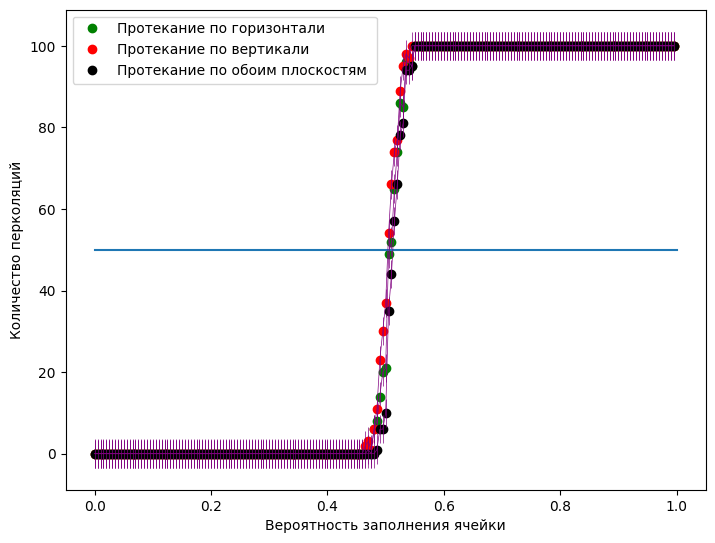

In [5]:

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
t = ['Протекание по горизонтали', 'Протекание по вертикали', 'Протекание по обоим плоскостям ']
name = [qh, qv, qb]
color = ['green', 'r', 'black']
for i in range(3):
    ax.plot(p, name[i], 'o',color = color[i])
    ax.errorbar(p, name[i] ,yerr = sc.stats.sem(name[i]), color = 'purple', linewidth = 0.5)
    ax.set_ylabel('Количество перколяций')
    ax.set_xlabel('Вероятность заполнения ячейки')
ax.legend(t)
ax.plot( [0,1],[50, 50])

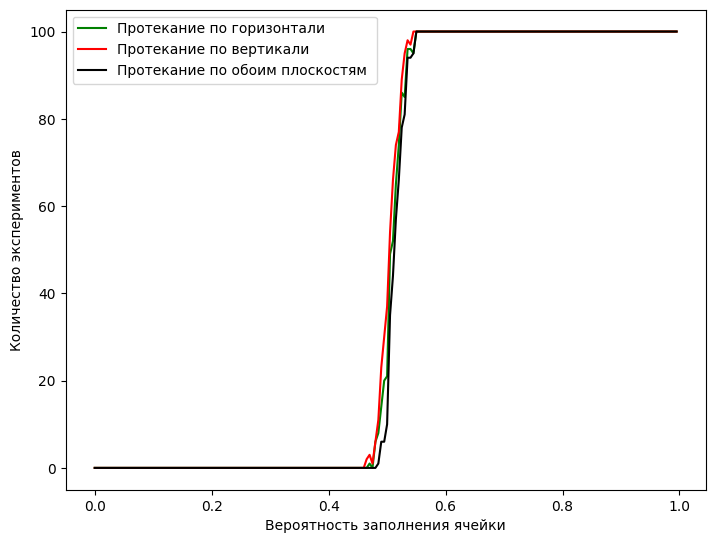

In [27]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
t = ['Протекание по горизонтали', 'Протекание по вертикали', 'Протекание по обоим плоскостям ']
name = [qh, qv, qb]
color = ['green', 'r', 'black']
for i in range(3):
    ax.plot(p, name[i],color = color[i])
    #ax.errorbar(p, name[i] ,yerr = sc.stats.sem(name[i]), color = 'purple', linewidth = 0.5)
    ax.set_ylabel('Количество экспериментов')
    ax.set_xlabel('Вероятность заполнения ячейки')
ax.legend(t)

Рассмотреть на уровне 50 при размерах квадартной решетки(30, 60, 120, 200). Посмотреть к чему стремится $p(L)$

In [28]:
len(qh)

200

In [30]:
def find_p(arr, l, eps):
    r = []
    for i in range(len(arr)):
        if l-eps < arr[i] < l+eps:
            r.append(p[i])
    return r
q = [(qv,'вертикали'),(qh,'горизонтали'),(qb, 'обоим')]
for i, k in q:
    print("Порог перколяции по" + k+":", min(find_p(i, 50,11)))

Порог перколяции повертикали: 0.505
Порог перколяции погоризонтали: 0.505
Порог перколяции пообоим: 0.51
